# Credit Default Taiwan


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). 
- X12 = amount of bill statement in September, 2005; 
- X13 = amount of bill statement in August, 2005; . . .; 
- X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). 
- X18 = amount paid in September, 2005; 
- X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

Import essential libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read in the dataset

In [5]:
orig_df = pd.read_excel(r'UCI - default of credit card clients_DATASET\default of credit card clients.xls')
orig_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


using the first row as the new column headers so that:
1) the dtypes of the values are uniform for each column
2) to understand what values the column contains more easily

In [6]:
df = orig_df.copy()
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

## EDA
- understand the dataset, especially about the people that the data describes
--- 

Female    18112
Male      11888
Name: SEX, dtype: int64


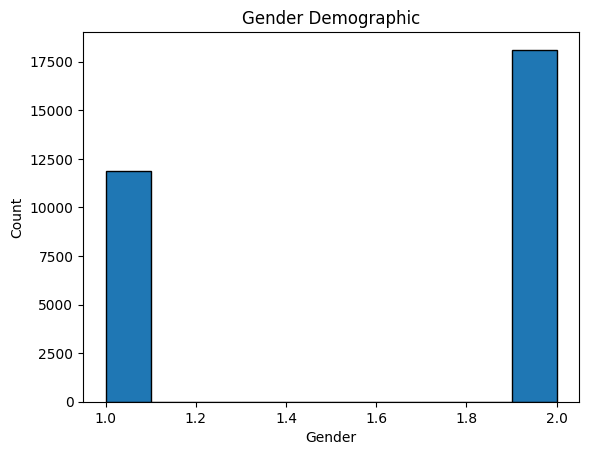

count     30000
unique        2
top           2
freq      18112
Name: SEX, dtype: int64

In [6]:
print(df['SEX'].map({1: 'Male', 2: 'Female'}).value_counts())
sex_hist = plt.hist(df['SEX'], edgecolor= 'black')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Demographic')

plt.show()

df['SEX'].describe() # Gender (1 = male; 2 = female)

- There are more female (gender == 2), than male (gender == 1) customers
    - Percentage Difference = ((18112 - 11888) / 11888) * 100 = 52.36%
    - There are around 52.36% more females than males
--- 

university         14030
graduate school    10585
high school         4917
others               123
Name: EDUCATION, dtype: int64


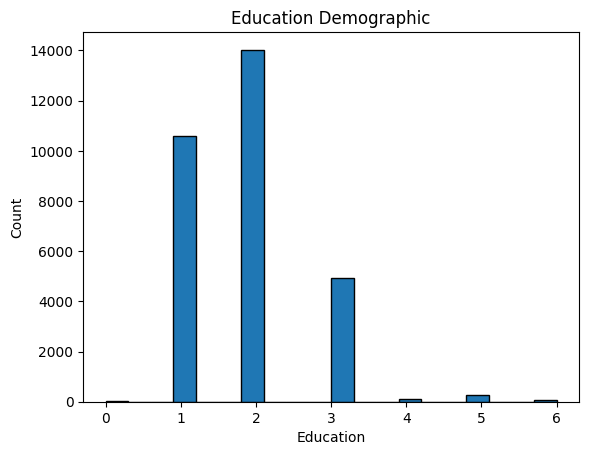

count     30000
unique        7
top           2
freq      14030
Name: EDUCATION, dtype: int64

In [7]:
print(df['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}).value_counts())
educ_hist = plt.hist(df['EDUCATION'], bins= 20, edgecolor= 'black')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Demographic')

plt.show()

df['EDUCATION'].describe() #Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

    - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- Majority of the customers have a university degree
- A graduate degree is the second highest most common degree held by customers
--- 

single     15964
married    13659
others       323
Name: MARRIAGE, dtype: int64


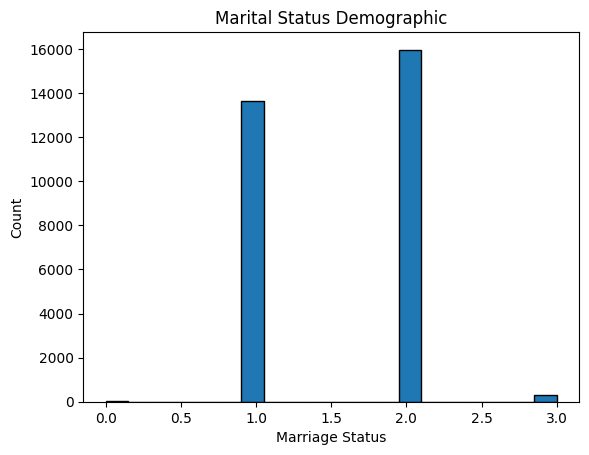

count     30000
unique        4
top           2
freq      15964
Name: MARRIAGE, dtype: int64

In [8]:
print(df['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others'}).value_counts())
marriage_hist = plt.hist(df['MARRIAGE'], bins= 20, edgecolor= 'black')

plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.title('Marital Status Demographic')

plt.show()

df['MARRIAGE'].describe() # Marital status (1 = married; 2 = single; 3 = others)

    - Marital status (1 = married; 2 = single; 3 = others)
- Majority of the customers are single, with 16.9% more than married customers 
    - (Percentage Discrepancy = ((15964 - 13659) / 13659) * 100 = 16.9%)

- However, customers that are married follow closely, in terms of number
--- 

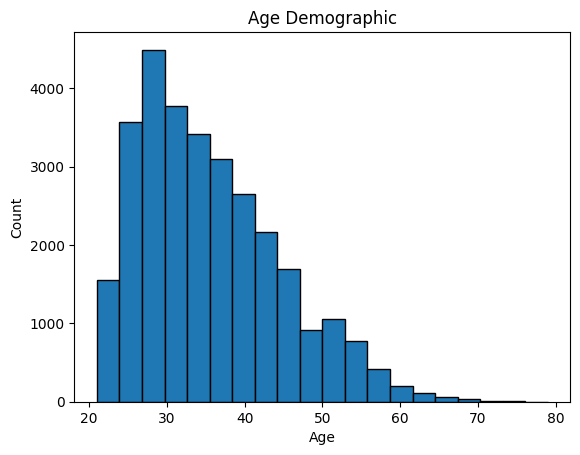

median:   34.0
mode:   29


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [9]:
age_hist = plt.hist(df['AGE'], bins= 20, edgecolor= 'black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Demographic')

plt.show()

print('median:  ',df['AGE'].median())
mode_duration = df['AGE'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['AGE'].astype(float).describe()

- the age range customers from the dataset is 21 to 79 years old
- the median average age is 34 years old
- the most prevalent (mode average) age of customers is 29 years old
--- 

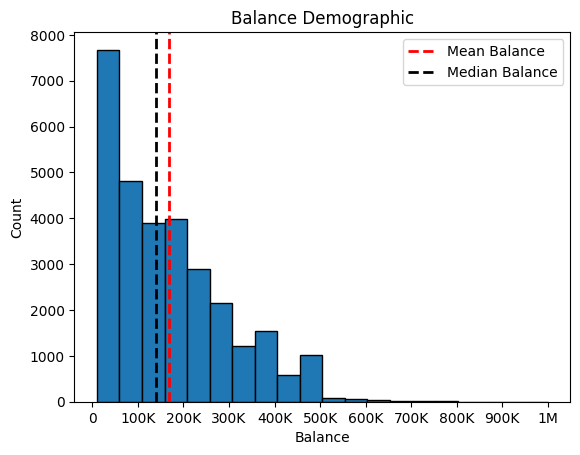

median:   140000.0
mode:   50000


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [10]:
balance_hist = plt.hist(df['LIMIT_BAL'], bins=20, edgecolor='black')

plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance Demographic')
plt.xticks(
    ticks=[0, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 1e6],
    labels=['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M']
)
# Calculate mean and median age
mean_bal = df['LIMIT_BAL'].mean()
median_bal = df['LIMIT_BAL'].median()

# Add a vertical line for the mean bal
plt.axvline(mean_bal, color='red', linestyle='dashed', linewidth=2, label='Mean Balance')

# Add a vertical line for the median bal
plt.axvline(median_bal, color='black', linestyle='dashed', linewidth=2, label='Median Balance')

plt.legend()
plt.show()

print('median:  ',df['LIMIT_BAL'].median())
mode_duration = df['LIMIT_BAL'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['LIMIT_BAL'].astype(float).describe()

_LIMIT_BAL_ is the credit limit granted to the debtor (the borrower)

- the median average credit limit that is granted is NT$140,000. So, half have a limit below this amount, and half have above this amount.
- the most common credit limit (mode average) granted is NT$50,000.
- the average credit limit is NT$167,484.32 (mean average).
- the lowest credit limit is NT$10,000.
- the highest credit limit is NT$1,000,000.
---

In [11]:
orig_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [12]:
age_limit_bal = df[['AGE','LIMIT_BAL']]
age_limit_bal.head()

,AGE,LIMIT_BAL
0,24,20000
1,26,120000
2,34,90000
3,37,50000
4,57,50000


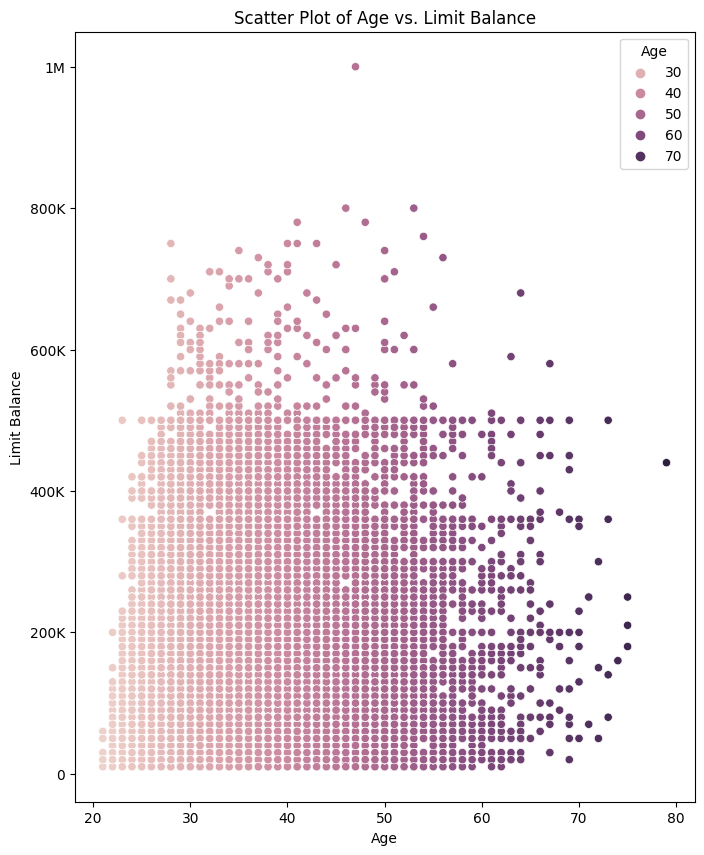

In [13]:

from matplotlib.ticker import FuncFormatter
# Select the columns 'AGE' and 'LIMIT_BAL'
age_limit_bal = df[['AGE', 'LIMIT_BAL']]

# Create a scatter plot with color distinctions for each age group
plt.figure(figsize=(8, 10))  # Optional: Adjust figure size
scatter_plot = sns.scatterplot(data=age_limit_bal, x='AGE', y='LIMIT_BAL', hue='AGE')

# Define a function to format y-axis tick labels as hundreds of thousands or millions
def balance_formatter(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 2e5:
        return f'{x/1e5:.0f}00K'
    else:
        return f'{x:.0f}'

# Apply the balance_formatter to the y-axis ticks
scatter_plot.yaxis.set_major_formatter(FuncFormatter(balance_formatter))

plt.title('Scatter Plot of Age vs. Limit Balance')
plt.xlabel('Age')
plt.ylabel('Limit Balance')

plt.legend(title='Age')
plt.show()

- there seems to be a common credit limit at around 500K ceiling throughout the age ranges
- as age increases past 55 around years old, those with credit limit past 500K decreases
- as age increases past around 55 years old, those with credit limit below 500K tapers off, as seen from the density of the scatterplot
--- 
- we can interpret this as those that are older are don't need loans as high as those younger due to possibly more assets or liquidity to cover possible debt incurred. This can maybe be attributed to better financial stability
- this can also be interpreted as lowe credit limit for those older, since their ability to pay may decrease since the ages of late 50s and upwards are typically associated with the retirement years, hence personal income may be reduced since they could possibly be retiring and only have pension and passive income as their cash flow.
--- 

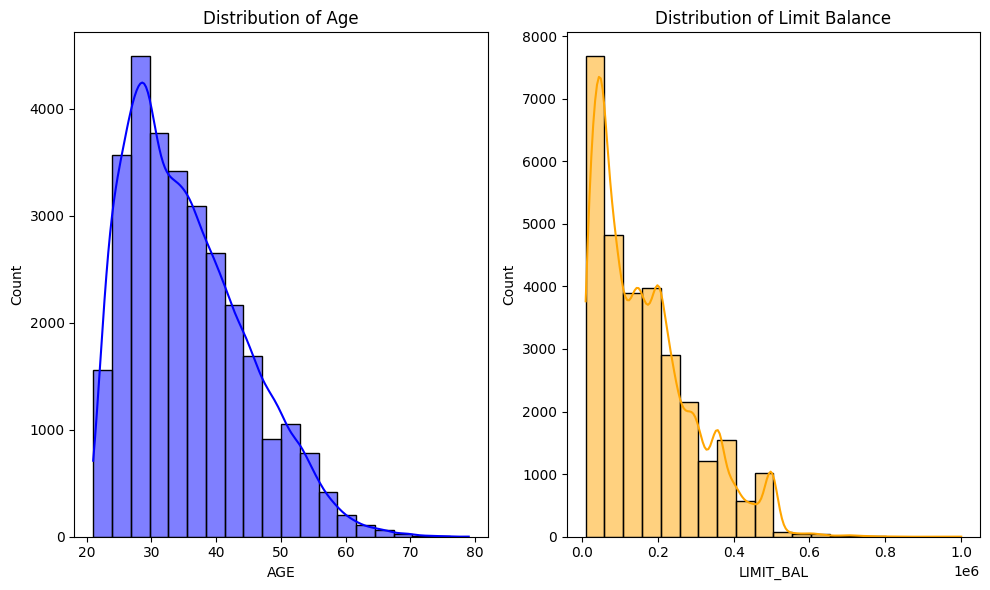

median:   140000.0
mode:   50000
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
median:   34.0
mode:   29
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [14]:

plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

# Create a histogram for 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(data=age_limit_bal, x='AGE', bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

# Create a histogram for 'LIMIT_BAL'
plt.subplot(1, 2, 2)
sns.histplot(data=age_limit_bal, x='LIMIT_BAL', bins=20, kde=True, color='orange')
plt.title('Distribution of Limit Balance')

plt.tight_layout()
plt.show()

print('median:  ',df['LIMIT_BAL'].median())
mode_duration = df['LIMIT_BAL'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
print(df['LIMIT_BAL'].astype(float).describe())

print('median:  ',df['AGE'].median())
mode_duration = df['AGE'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
print(df['AGE'].astype(float).describe())

In [15]:
customer_demographic = df[['ID', 'LIMIT_BAL', 'AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month']]

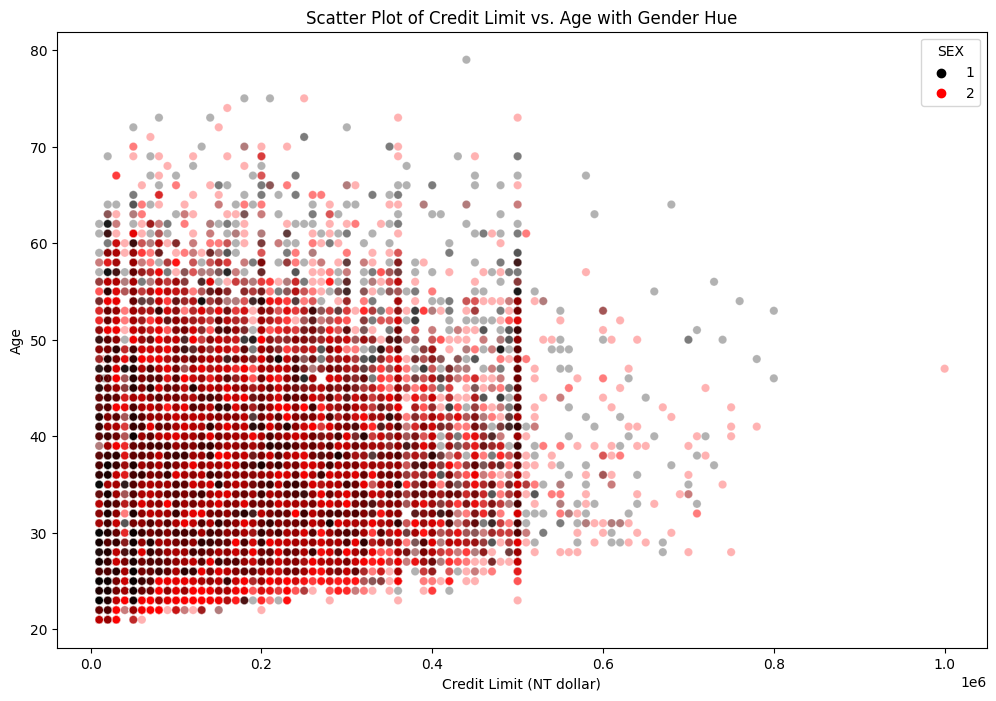

In [16]:
# Subset the data
customer_demographic_1 = df[['LIMIT_BAL', 'AGE', 'SEX']]

# Create a larger figure
plt.figure(figsize=(12, 8))

custom_palette = {1: 'black', 2: 'red'}

# Create the scatter plot with alpha
sns.scatterplot(data=customer_demographic, x='LIMIT_BAL', y='AGE', hue='SEX', alpha=0.3, palette=custom_palette)

# Add labels and title
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Age')
plt.title('Scatter Plot of Credit Limit vs. Age with Gender Hue')

# Show the plot
plt.show()

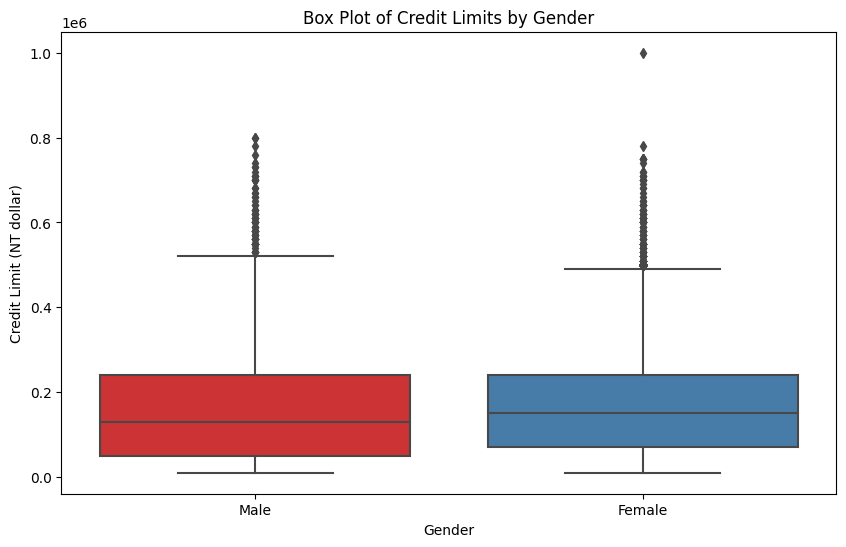

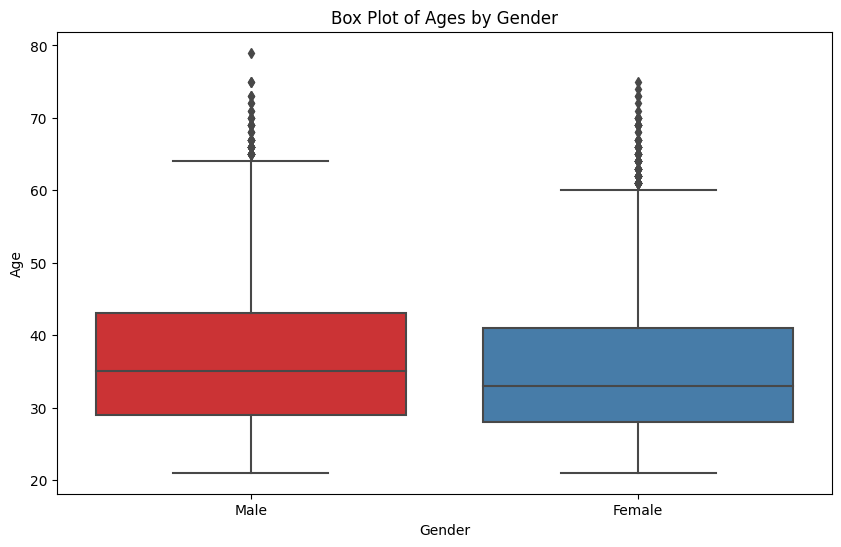

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_demographic_1, x='SEX', y='LIMIT_BAL', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Credit Limit (NT dollar)')
plt.title('Box Plot of Credit Limits by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_demographic_1, x='SEX', y='AGE', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Ages by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

    1 = male, 2 = female

- the credit limit given to males vs females are virtually the same. 
- the lower credit limit of the body of the boxplot for females is only slightly higher
- the males are generally older (30s- mid 40s) than the females (late 20s - late 30s)
--- 

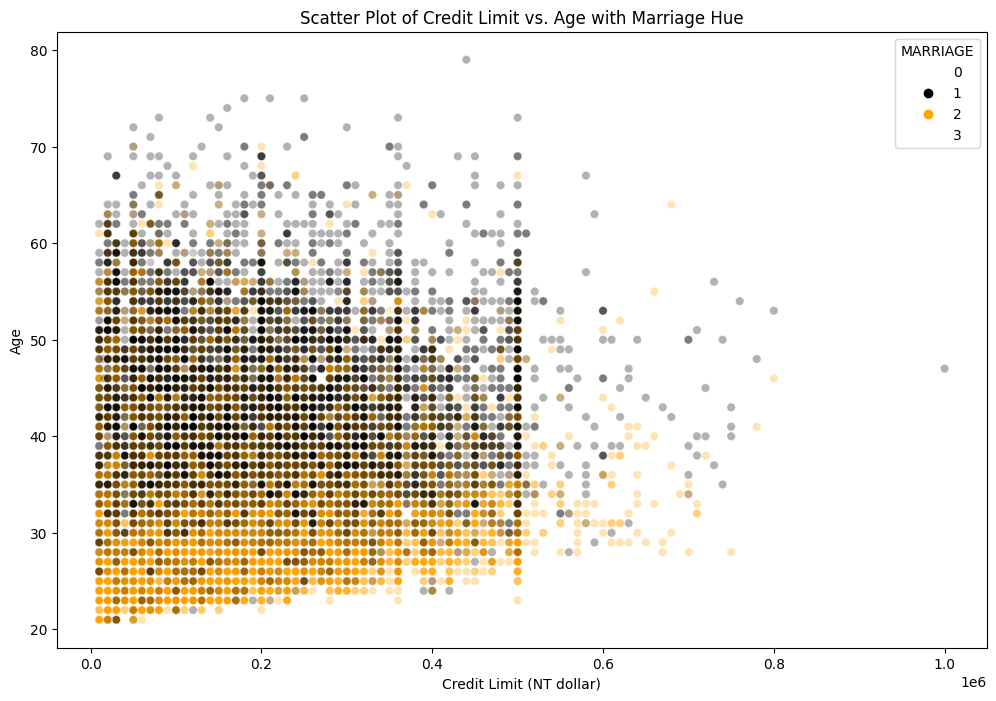

In [18]:
# Subset the data
customer_demographic_2 = df[['LIMIT_BAL', 'AGE', 'MARRIAGE']]

# Create a larger figure
plt.figure(figsize=(12, 8))

custom_palette = {1: 'black', 2: 'orange', 3: 'white'}

# Create the scatter plot with alpha
sns.scatterplot(data=customer_demographic_2, x='LIMIT_BAL', y='AGE', hue='MARRIAGE', alpha=0.3, palette=custom_palette)

# Add labels and title
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Age')
plt.title('Scatter Plot of Credit Limit vs. Age with Marriage Hue')

# Show the plot
plt.show()

    Marital status (1 = married; 2 = single; 3 = others)

- there are more married debtors from around the mid 30s and upwards
- majority of the debtors are at or below mid 30s
--- 


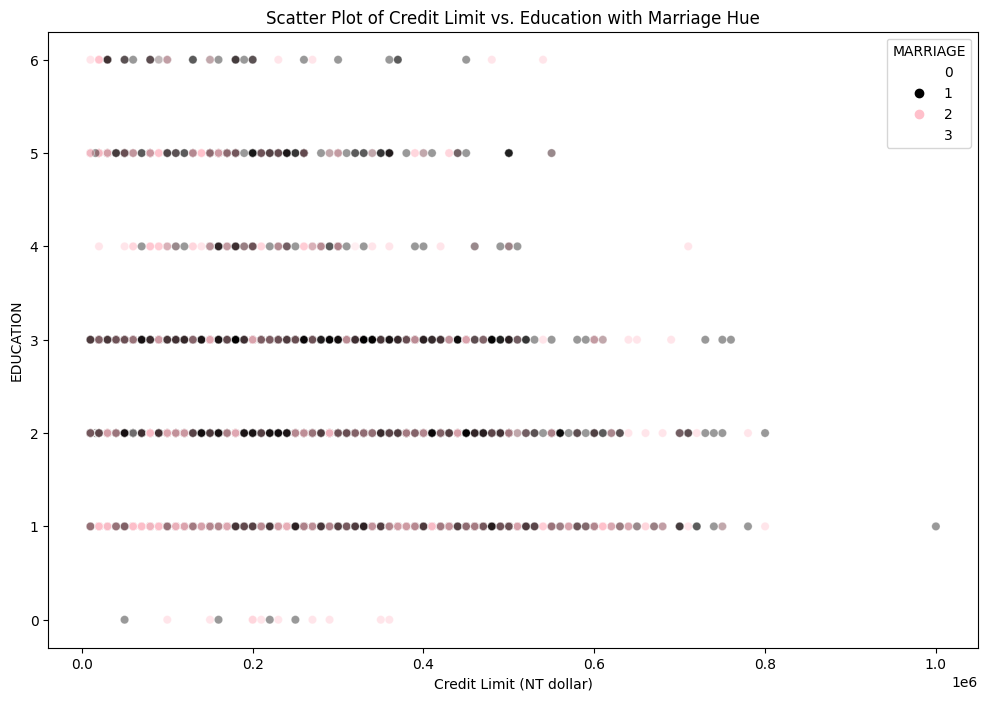

In [19]:
# Subset the data
customer_demographic_3 = df[['LIMIT_BAL', 'MARRIAGE', 'EDUCATION']]

# Create a larger figure
plt.figure(figsize=(12, 8))

custom_palette = {1: 'black', 2: 'pink', 3: 'white',}

# Create the scatter plot with alpha
sns.scatterplot(data=customer_demographic_3, x='LIMIT_BAL', y='EDUCATION', hue='MARRIAGE', alpha=0.4, palette=custom_palette)

# Add labels and title
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('EDUCATION')
plt.title('Scatter Plot of Credit Limit vs. Education with Marriage Hue')

# Show the plot
plt.show()

    Marital status (1 = married; 2 = single; 3 = others)
    Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

- most of those that have a university degree are married
- there are more single people amongst those with a graduate degree
- majority of those with a high school diploma are married
- the credit limit range is virtually the same amongst those that have a university or graduate school degree and high school diploma
--- 

<AxesSubplot: xlabel='0', ylabel='0'>

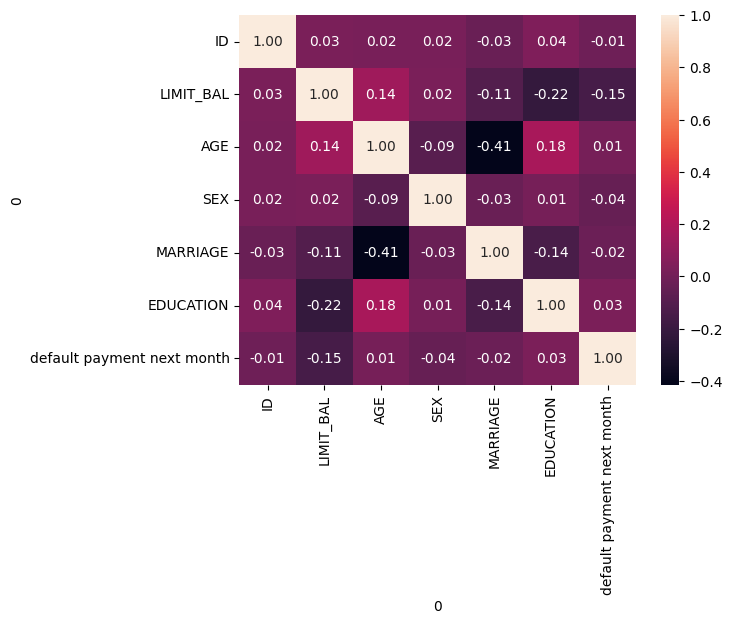

In [20]:
sns.heatmap(data=customer_demographic.astype(int).corr(),annot=True, fmt=".2f")

- the correlation matrix shows that there is little correlation amongst these variables except:
    - age and marriage have the highest negative correlation with respect to the other variables. this makes sense, since the younger a person is, the less likely that they are married

--- 

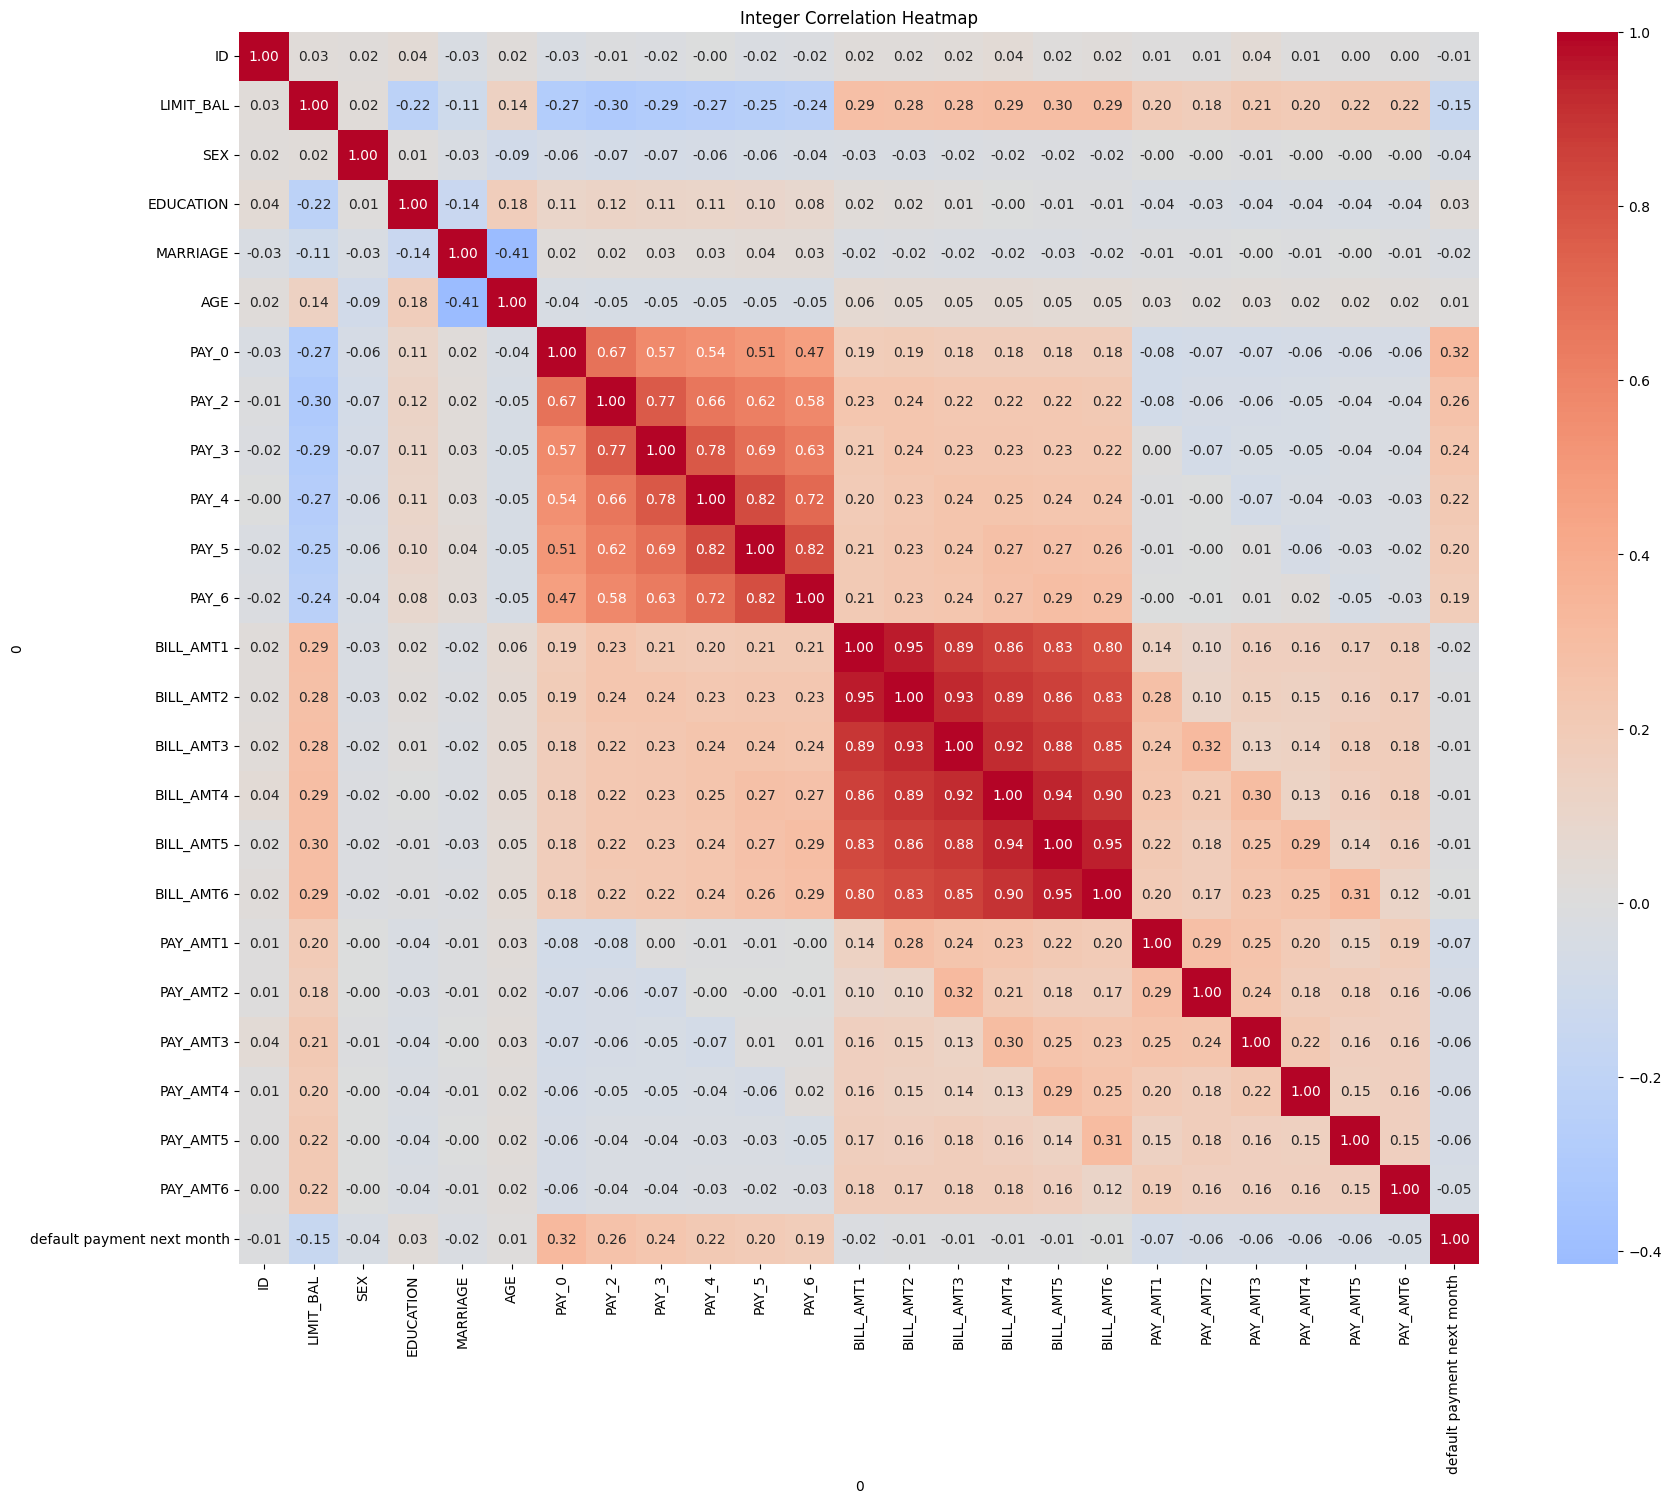

In [21]:
# Convert the entire DataFrame to integer values
df_int = df.astype(int)

plt.figure(figsize=(20, 16))  # Adjust figure size for better readability

# Calculate the correlation matrix and create a heatmap
sns.heatmap(data=df_int.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Integer Correlation Heatmap')
plt.show()

    PAY_# : History of past payment. We tracked the past monthly payment records (from April to September, 2005)

    BILL_AMT#: Amount of bill statement from April - September 2005 (NT dollar). 

    PAY_AMT#: Amount of previous payment from April - September 2005 (NT dollar). 

- the bill statements (BILL_AMT) are all highly correlated which is to be expected.
- the history of past payments (PAY_#) are also highly correlated which is to be expected.
- the previous payment about (PAY_AMT#) are weak positively correlated

* these high correlations may pose a problem for our model's effectiveness, hence it will be addressed later on.
--- 


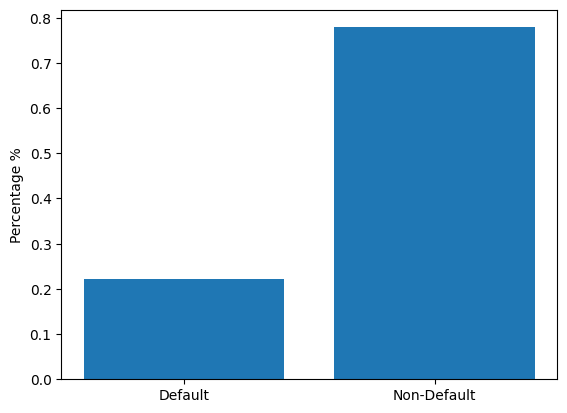

In [22]:
default = len(df['default payment next month'])
pos_default = len(df[df['default payment next month']== 1])
percent_default = len(df[df["default payment next month"]== 1])/len(df["default payment next month"])
percent_non_default = 1- percent_default
label = ["Default", "Non-Default"]
percent = [percent_default, percent_non_default]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

- majority of the debtors are not in default
- this imbalance in the dataset, with respect to positive defaults need to be addressed, or else it may negatively affect our model training.
--- 

## Data Preprocessing
- preparing the data for model training:
    - standardizing, undersampling, splitting the data
--- 

In [7]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [8]:
columns_to_exclude = ['ID', 'LIMIT_BAL', 'AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Use the negation operator (~) to select the columns not in the exclusion list
to_pca = df.loc[:, ~df.columns.isin(columns_to_exclude)]
to_pca.shape

(30000, 12)

Using PCA to reduce the high correlation so that we can minimize the effect it has on training the models

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_pca)

# Apply PCA with desired number of components
n_components = 12
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

print(pca_df.shape)
print(df.shape)

(30000, 12)
(30000, 25)


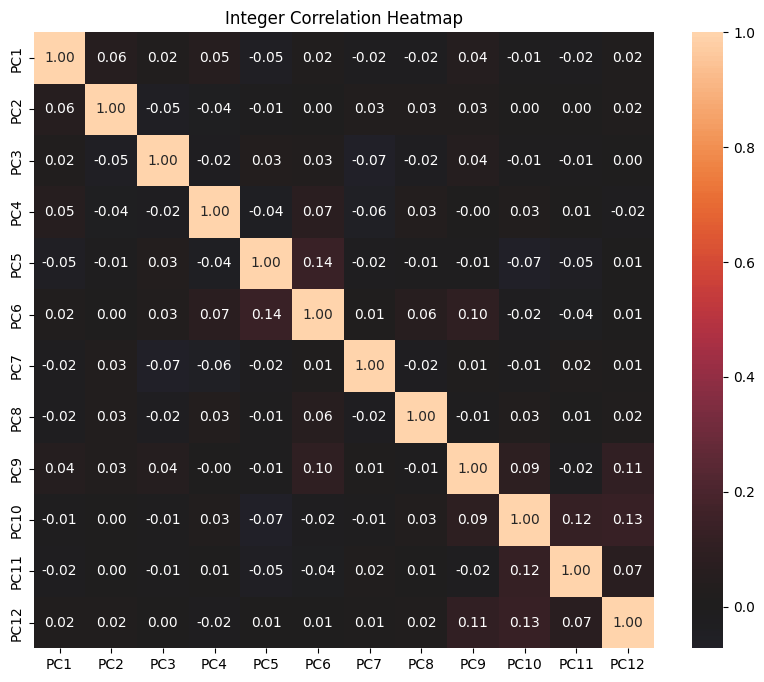

In [10]:
# Convert the entire DataFrame to integer values
df_int = pca_df.astype(int)

plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Calculate the correlation matrix and create a heatmap
sns.heatmap(data=df_int.corr(), annot=True, fmt=".2f", center=0)

plt.title('Integer Correlation Heatmap')
plt.show()

we reattach the tweaked data to the rest of the df again

In [11]:
exclude_df = df[columns_to_exclude]

# Concatenate pca_df and exclude_df horizontally
new_df = pd.concat([exclude_df, pca_df], axis=1)

new_df.head()

,ID,LIMIT_BAL,AGE,SEX,MARRIAGE,EDUCATION,default payment next month,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1,20000,24,2,1,2,1,0,689,0,...,-3.154740,-0.335395,0.531123,-0.240102,0.876024,0.572024,0.149370,-0.029049,-0.077220,-0.059976
1,2,120000,26,2,2,2,1,0,1000,1000,...,0.871128,0.347304,0.743847,-1.950749,0.256807,0.805708,0.256585,-0.040080,-0.010634,-0.074379
2,3,90000,34,2,2,2,0,1518,1500,1000,...,0.182847,-0.001305,-0.028092,-0.078497,0.003352,0.010990,-0.100138,-0.041050,0.086002,0.059449
3,4,50000,37,2,1,2,0,2000,2019,1200,...,0.147701,0.050269,-0.174367,-0.109448,-0.016773,0.016714,0.028006,0.147460,-0.031934,0.032009
4,5,50000,57,1,1,2,0,2000,36681,10000,...,0.888318,0.041123,0.140147,-0.298080,0.663681,0.294839,0.257584,0.135037,0.048948,0.071411


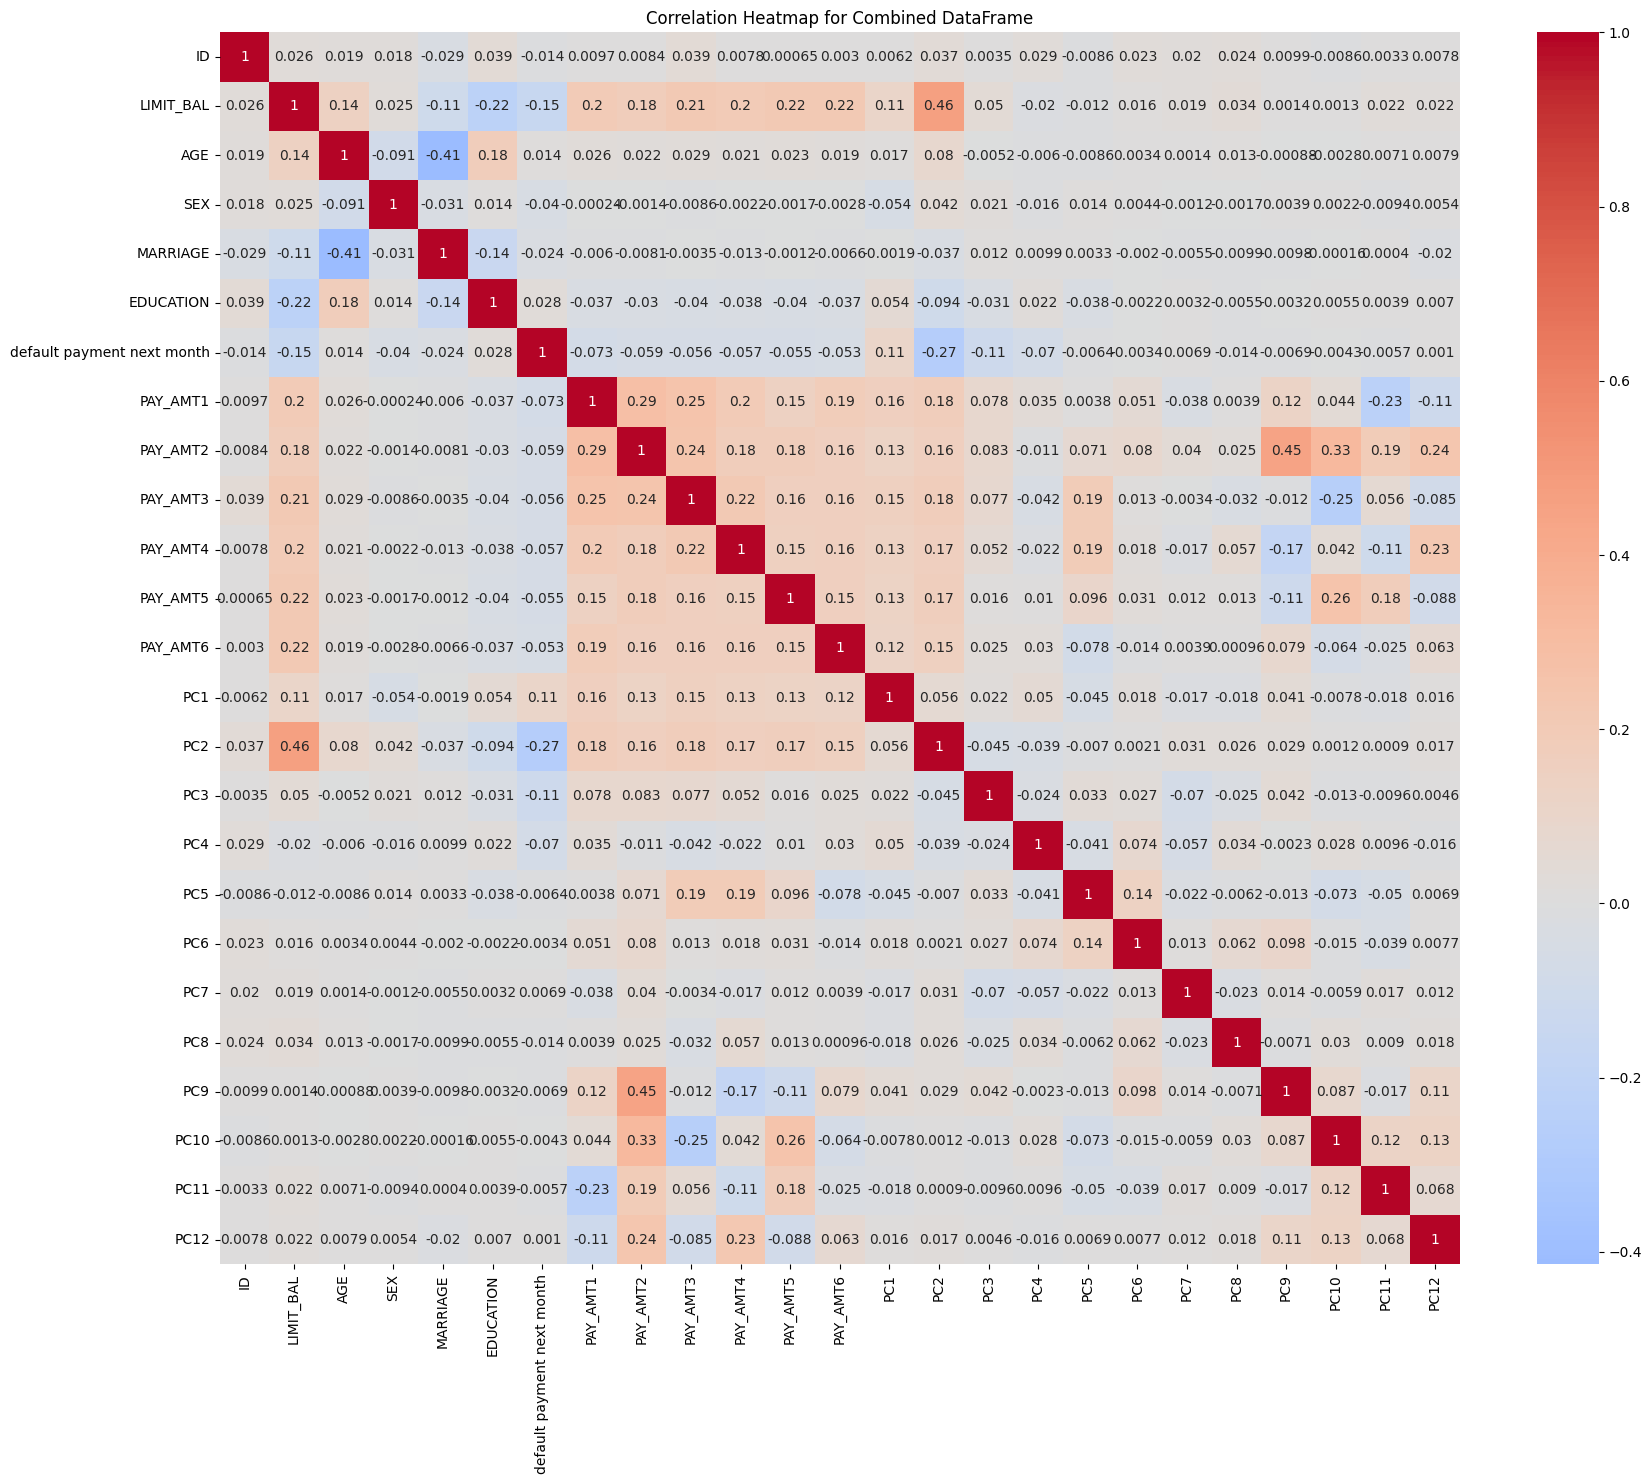

In [12]:
correlation_matrix = new_df.astype(int).corr()

plt.figure(figsize=(20, 16))  

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap for Combined DataFrame')
plt.show()

- as shown from the corr heatmap, there are now no barely any highly correlated values which may affect our training
---

- shuffle, sample, scale, encode, and split to training, validating, and testing data

In [13]:
new_df_shuffled = new_df.sample(frac=1, random_state=42)

In [14]:
X = new_df_shuffled.drop(columns=['default payment next month', 'ID'])
y = new_df_shuffled['default payment next month']

print(X.shape, y.shape)

(30000, 23) (30000,)


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert X and y to NumPy arrays
X_numpy = np.array(X)
y_numpy = np.array(y)

# Create a label encoder
label_encoder = LabelEncoder()

# Convert y to numeric labels
y_encoded = label_encoder.fit_transform(y_numpy)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_numpy, y_encoded, test_size=0.3, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

In [17]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(21000, 23) (21000,) (4500, 23) (4500,)


In [18]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
# Create a label encoder
label_encoder = LabelEncoder()

# Convert y_train to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and apply an undersampler
under_sampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train_encoded)


In [19]:
print("Shape of X_train:", X_train_resampled.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train_resampled.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9290, 23)
Shape of X_val: (4500, 23)
Shape of X_test: (4500, 23)
Shape of y_train: (9290,)
Shape of y_val: (4500,)
Shape of y_test: (4500,)


## Training the Models and Looking for the best performing one

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [21]:
logReg = LogisticRegression()
logReg.fit(X_train_resampled, y_train_resampled)

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print(classification_report(y_val, logReg.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      3505
           1       0.31      0.67      0.42       995

    accuracy                           0.60      4500
   macro avg       0.59      0.62      0.56      4500
weighted avg       0.74      0.60      0.63      4500



- Precision is 0.29:
    - Out of all instances predicted as class 1 (default), only 29% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
- Recall is 0.70:
    - the model identified 70% of the actual default instances.
- F1-score is 0.41:
    - reflecting the trade-off between precision and recall.
- Accuracy is 0.55:
    - Overall accuracy of the model is 55%. 

In [23]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(logReg, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.60037523 0.60655738 0.60451977 0.57142857 0.59474672 0.56338028
 0.57168784 0.60998152 0.61099796 0.57559199]
Mean CV Score: 0.5909267260168904
Std CV Score: 0.017444678402183653


c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Mean CV Score of 0.586 means that this Logistic Regression model is just a bit better at predicting credit default than a 50/50 guess.
--- 

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42) 
RF_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [25]:
print(classification_report(y_val, RF_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      3505
           1       0.45      0.67      0.54       995

    accuracy                           0.75      4500
   macro avg       0.67      0.72      0.68      4500
weighted avg       0.79      0.75      0.76      4500



- Precision of class 0 is 0.89, and for class 1 is 0.44:
    - 89% of all instances was predicted as class 0 (not default)
    - Out of all instances predicted as class 1 (default),  44% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
    - the class 1 score improved from the Log Reg model, but is still not that high
- Recall of class 0 is 0.76, and for class 1 is 0.66:
    - the model identified 76% of the actual not default instances.
    - the model identified 66% of the actual default instances.
- Accuracy is 0.74:
    - Overall accuracy of the model is 74%. 

In [26]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(RF_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.76010101 0.75773196 0.73284314 0.74029126 0.71674877 0.71536524
 0.75233645 0.71116505 0.70217918 0.73429952]
Mean CV Score: 0.7323061566827818
Std CV Score: 0.019421302755339317


- the Mean CV Score is 0.719, which is is better than the previous model
--- 

### Gradient Boost

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.01)
GB_model = GB_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, GB_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3505
           1       0.45      0.59      0.51       995

    accuracy                           0.75      4500
   macro avg       0.66      0.69      0.67      4500
weighted avg       0.78      0.75      0.76      4500



- Precision of class 1 is 0.45:
    - Out of all instances predicted as class 1 (default),  45% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
    - the class 1 score improved from the Random Forest model by 1%, but is still not that high
- Recall of class 0 is 0.79, and for class 1 is 0.60:
    - the model identified 79% of the actual not default instances.
    - the model identified 60% of the actual default instances.
- Accuracy is 0.75:
    - Overall accuracy of the model is 75%. 


In [28]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(GB_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.7816092  0.79428571 0.7431694  0.712      0.71313673 0.73569482
 0.77111717 0.70744681 0.73246753 0.75910364]
Mean CV Score: 0.7450031009353208
Std CV Score: 0.02900317944187753


- the Mean CV Score is 0.746, which is the best so far
---

### Support Vector Machine

In [29]:
from sklearn.svm import SVC

SVM_model = SVC(class_weight='balanced')
SVM_model = SVM_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, SVM_model.predict(X_val)))


              precision    recall  f1-score   support

           0       0.84      0.56      0.68      3505
           1       0.29      0.63      0.40       995

    accuracy                           0.58      4500
   macro avg       0.57      0.60      0.54      4500
weighted avg       0.72      0.58      0.61      4500



- Precision of class 1 is 0.29:
    - Out of all instances predicted as class 1 (default),  29% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
    - this did worse than the previous models
- Recall of class 0 is 0.56, and for class 1 is 0.64:
    - the model identified 56% of the actual not default instances.
    - the model identified 64% of the actual default instances.
- Accuracy is 0.58:
    - Overall accuracy of the model is 58%. 

- this model is barely better than the Logistic Regression model, but still unsatisfactory 

In [30]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(SVM_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.5814433  0.60362173 0.59832636 0.58246347 0.59509202 0.58064516
 0.57344064 0.60416667 0.56530612 0.58130081]
Mean CV Score: 0.5865806286554393
Std CV Score: 0.012416872274787896


- the Mean CV Score is 0.59, which is still not so good, as compared to the previous models
--- 

### K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, KNN_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      3505
           1       0.30      0.58      0.39       995

    accuracy                           0.61      4500
   macro avg       0.57      0.60      0.55      4500
weighted avg       0.72      0.61      0.64      4500



- Precision of class 1 is 0.28:
    - Out of all instances predicted as class 1 (default),  28% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
- Recall of class 0 is 0.60, and for class 1 is 0.54:
    - the model identified 60% of the actual not default instances.
    - the model identified 54% of the actual default instances.
- Accuracy is 0.58:
    - Overall accuracy of the model is 59%. 

In [32]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(KNN_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.60687961 0.60756501 0.58628319 0.58049887 0.57920792 0.56164384
 0.61135371 0.60434783 0.60132159 0.60045147]
Mean CV Score: 0.5939553018211372
Std CV Score: 0.015365176610375012


- the Mean CV Score is 0.595 which is ok, but still not good when taking into account the classification report 

### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model = NB_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, NB_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.90      0.13      0.22      3505
           1       0.24      0.95      0.38       995

    accuracy                           0.31      4500
   macro avg       0.57      0.54      0.30      4500
weighted avg       0.75      0.31      0.26      4500



- Precision of class 1 is 0.24:
    - Out of all instances predicted as class 1 (default),  24% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
- Recall of class 0 is 0.15, and for class 1 is 0.94:
    - the model identified 15% of the actual not default instances.
    - the model identified 94% of the actual default instances.
- Accuracy is 0.32:
    - Overall accuracy of the model is 32%. 

- though the recall score is good, the rest of the indicators show that this model didn't do well also

In [34]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(NB_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.53381643 0.51364176 0.52532391 0.52305825 0.51829988 0.52460984
 0.52038369 0.53019324 0.5274463  0.52033493]
Mean CV Score: 0.5237108228245531
Std CV Score: 0.005613071118613233


### sklearn Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier()
NN_model = NN_model.fit(X_train_resampled, y_train_resampled)

In [36]:
print(classification_report(y_val, NN_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3505
           1       0.33      0.04      0.07       995

    accuracy                           0.77      4500
   macro avg       0.56      0.51      0.47      4500
weighted avg       0.68      0.77      0.69      4500



- Precision of class 1 is 0.37:
    - Out of all instances predicted as class 1 (default),  37% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
- Recall of class 0 is 0.80, and for class 1 is 0.42:
    - the model identified 80% of the actual not default instances.
    - the model identified 42% of the actual default instances.
- Accuracy is 0.71:
    - Overall accuracy of the model is 71%. 

- though the accuracy score is good, the rest of the indicators show that this model didn't do well 

In [37]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(NN_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.8        0.51728248 0.51952663 0.51022727 0.50560538 0.78616352
 0.51270208 0.5095613  0.57165862 0.65037594]
Mean CV Score: 0.5883103220611877
Std CV Score: 0.11077863689555828


### tesnsorflow Neural Network

In [38]:
import tensorflow as tf

In [39]:
# Convert data types to a compatible type (e.g., float32)
X_train_resampled = X_train_resampled.astype(np.float)
y_train_resampled = y_train_resampled.astype(np.float)
X_val = X_val.astype(np.float)
y_val = y_val.astype(np.float)




C:\Users\enzo\AppData\Local\Temp\ipykernel_16932\3850580781.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_resampled = X_train_resampled.astype(np.float)
C:\Users\enzo\AppData\Local\Temp\ipykernel_16932\3850580781.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_resampled = y_train_resampled.astype(np.float)
C:\Use

In [40]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()

In [41]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train_resampled.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1985 (7.75 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 64 (256.00 Byte)
_____________________

In [44]:
# Train the model
epochs = 100  
history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
291/291 [==============================] - 1s 2ms/step - loss: 0.7015 - accuracy: 0.5689 - val_loss: 0.6451 - val_accuracy: 0.5811
Epoch 2/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5740 - val_loss: 0.6557 - val_accuracy: 0.5580
Epoch 3/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5803 - val_loss: 0.7625 - val_accuracy: 0.3284
Epoch 4/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.5823 - val_loss: 0.6876 - val_accuracy: 0.5227
Epoch 5/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5831 - val_loss: 0.6857 - val_accuracy: 0.4853
Epoch 6/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5907 - val_loss: 0.6629 - val_accuracy: 0.5489
Epoch 7/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5914 - val_loss: 0.6744 - val_accuracy: 0.5209

In [45]:
# evaluate model
model.evaluate(X_val, y_val)

141/141 [==============================] - 0s 707us/step - loss: 0.6907 - accuracy: 0.5693


[0.6907037496566772, 0.5693333148956299]

In [46]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_val, y_pred))

141/141 [==============================] - 0s 552us/step
              precision    recall  f1-score   support

         0.0       0.86      0.54      0.66      3505
         1.0       0.29      0.68      0.41       995

    accuracy                           0.57      4500
   macro avg       0.57      0.61      0.54      4500
weighted avg       0.73      0.57      0.61      4500



- Precision of class 1 is 0.31:
    - Out of all instances predicted as class 1 (default),  31% were actually true positives (actually defaulted), while the rest were false positives (not default, but was misclassified as default).
- Recall of class 0 is 0.60, and for class 1 is 0.63:
    - the model identified 60% of the actual not default instances.
    - the model identified 63% of the actual default instances.
- Accuracy is 0.60:
    - Overall accuracy of the model is 60%. 

- this model also doesn't do well with our data based on the metrics overall.

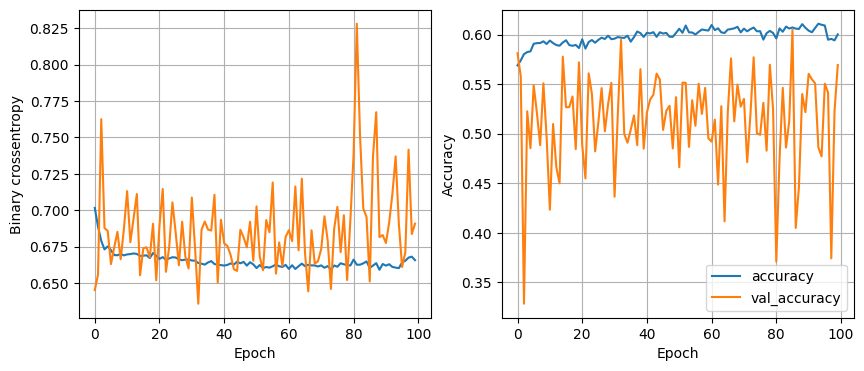

In [47]:
plot_history(history)

Let's try to redo the models; but this time, let's try to find the best hyperparameters for the models:

## Randomized Search with Cross Validation

In [48]:
from sklearn.model_selection import RandomizedSearchCV

Logistic Regression

In [49]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

logReg = LogisticRegression()

random_search_logReg = RandomizedSearchCV(estimator=logReg, param_distributions=param_dist, n_iter=10, cv=10, verbose=0)
random_search_logReg.fit(X_train_resampled, y_train_resampled)

best_params_logReg = random_search_logReg.best_params_
best_model_logReg = random_search_logReg.best_estimator_

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\enzo\AppData\Local\Programs\Python

In [50]:
print(best_params_logReg, best_model_logReg)

{'solver': 'newton-cg', 'max_iter': 1000, 'C': 1} LogisticRegression(C=1, max_iter=1000, solver='newton-cg')


In [61]:
best_logreg_model = LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

# Train the best model on your training data
best_logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation or test dataset
y_pred = best_logreg_model.predict(X_val)

# Evaluate the model's performance

print(classification_report(y_val, y_pred))

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


              precision    recall  f1-score   support

         0.0       0.87      0.71      0.79      3505
         1.0       0.39      0.64      0.48       995

    accuracy                           0.70      4500
   macro avg       0.63      0.67      0.63      4500
weighted avg       0.77      0.70      0.72      4500



c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Random Forest

In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

RF_model_rs = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(estimator=RF_model_rs, param_distributions=param_dist, n_iter=10, cv=10,verbose= 0)
random_search_rf.fit(X_train_resampled, y_train_resampled)

best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_


In [52]:
print(best_params_rf, best_model_rf)

{'n_estimators': 200, 'max_depth': 10} RandomForestClassifier(max_depth=10, n_estimators=200)


In [62]:
# Using the best hyperparameters for Random Forest
best_rf_model = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

# Train the best model on your training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation or test dataset
y_pred = best_rf_model.predict(X_val)

# Evaluate the model's performance
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      3505
         1.0       0.46      0.65      0.54       995

    accuracy                           0.75      4500
   macro avg       0.67      0.72      0.69      4500
weighted avg       0.79      0.75      0.77      4500



Gradient Boost

In [53]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
}

GB_model_rs = GradientBoostingClassifier()

random_search_gb = RandomizedSearchCV(estimator=GB_model_rs, param_distributions=param_dist, n_iter=10, cv=10)
random_search_gb.fit(X_train_resampled, y_train_resampled)

best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_


In [54]:
print(best_params_gb, best_model_gb)

{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01} GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300)


In [63]:
# Using the best hyperparameters for Gradient Boosting
best_gb_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300, random_state=42)

# Train the best model on your training data
best_gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation or test dataset
y_pred = best_gb_model.predict(X_val)

# Evaluate the model's performance
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      3505
         1.0       0.46      0.64      0.54       995

    accuracy                           0.75      4500
   macro avg       0.67      0.71      0.68      4500
weighted avg       0.79      0.75      0.77      4500



SVM

In [55]:

# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# SVM_model_rs = SVC()

# random_search_svm = RandomizedSearchCV(estimator=SVM_model_rs, param_distributions=param_dist, n_iter=10, cv=5)
# random_search_svm.fit(X_train_resampled, y_train_resampled)

# best_params_svm = random_search_svm.best_params_
# best_model_svm = random_search_svm.best_estimator_


In [56]:
# print(best_params_svm, best_model_svm)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    # Add more hyperparameters and their values
}

KNN_model_rs = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(estimator=KNN_model_rs, param_distributions=param_dist, n_iter=10, cv=10)
random_search_knn.fit(X_train_resampled, y_train_resampled)

best_params_knn = random_search_knn.best_params_
best_model_knn = random_search_knn.best_estimator_


In [58]:
print(best_params_knn, best_model_knn)

{'weights': 'distance', 'p': 2, 'n_neighbors': 10} KNeighborsClassifier(n_neighbors=10, weights='distance')


In [64]:
# Using the best hyperparameters for KNN
best_knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Train the best model on your training data
best_knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation or test dataset
y_pred = best_knn_model.predict(X_val)

# Evaluate the model's performance
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.64      0.73      3505
         1.0       0.31      0.58      0.41       995

    accuracy                           0.62      4500
   macro avg       0.58      0.61      0.57      4500
weighted avg       0.73      0.62      0.66      4500



In [59]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

SK_NN_rs = MLPClassifier()

random_search_mlp = RandomizedSearchCV(estimator=SK_NN_rs, param_distributions=param_dist, n_iter=10, cv=5)
random_search_mlp.fit(X_train_resampled, y_train_resampled)

best_params_mlp = random_search_mlp.best_params_
best_model_mlp = random_search_mlp.best_estimator_


c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning

In [60]:
print(best_params_mlp, best_model_mlp)

{'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'} MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50))


In [65]:
# Using the best hyperparameters for MLP NN
best_mlp_model = MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), solver='adam', activation='relu', random_state=42)

# Train the best model on your training data
best_mlp_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation or test dataset
y_pred = best_mlp_model.predict(X_val)

# Evaluate the model's performance
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.19      0.31      3505
         1.0       0.24      0.91      0.38       995

    accuracy                           0.35      4500
   macro avg       0.56      0.55      0.35      4500
weighted avg       0.74      0.35      0.33      4500

